# Red de impactos calor modificada (Axel Osses, 2024)

In [2]:
!pip install DCM2
from DCM import DCM

import numpy as np
import pandas as pd

from matplotlib import rc
from matplotlib import cm
import matplotlib.pyplot as plt
rc('font',**{'family':'sans-serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42

import matplotlib as mpl
import matplotlib.pylab as pl
from matplotlib.colors import LinearSegmentedColormap

### funciones útiles

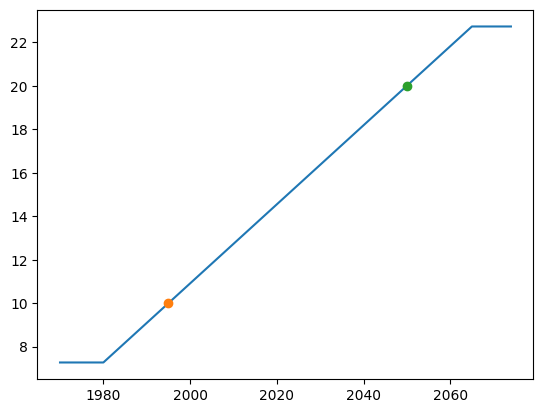

In [3]:
def lineal(ini,fin,Min,Max,band):
#    a = lambda x: minimo+(x>inicio)*min((maximo-minimo)/(fin-inicio) * (x-inicio),maximo-minimo)
    pend = (Max-Min)/(fin-ini)
    a = lambda x: (Min+pend*(-band))*(x<=ini-band)+(x>ini-band)*min(Min+pend*(x-ini),Min+pend*(fin+band-ini))
    return a
y=lineal(1995,2050,10,20,15)
r=range(1970,2075)
graf=np.empty((len(r)))
j=0
for i in r:
    graf[j] = y(i)
    j=j+1
plt.plot(r,graf)
plt.plot(1995,10,'o')
plt.plot(2050,20,'o')
plt.savefig('lineal.pdf', bbox_inches = 'tight')
plt.show()

def sigmoide(inicio,fin,minimo,maximo):
    a = lambda x: minimo+(x>-100)*((maximo-minimo)*0.5*(np.tanh(0.1*(x-(inicio+fin)/2))+1))
    return a
def grafico(mapa,ciudad):
    Tmax=27
    factor2=1/5
    uhi_id = mapa.nodes_id['UHI']
    puhi_id = mapa.forcers_id['PUHI']
    pvul_id = mapa.forcers_id['PVul']
    itc_id = mapa.nodes_id['ITC']
    csud_id = mapa.nodes_id['CsUD']
    thi_id = mapa.nodes_id['ThI']
    isp_id = mapa.nodes_id['ISP']
    ptemp_id = mapa.forcers_id['PT']
    temp_id = mapa.nodes_id['T']
    ap_id = mapa.nodes_id['AP']
    hw_id = mapa.forcers_id['HW']
    o3_id = mapa.nodes_id['O3']

    fig = plt.figure(figsize=(20,25))
#    fig.tight_layout(pad=5.0)
    plt.suptitle(ciudad,size=30,y=0.9)

    ax0 = fig.add_subplot(3,2,1)
    ax0.set_xlabel('Year', size = 25)
    ax0.set_ylabel('Node value', size = 25)
    ax0.tick_params(axis='both', which='major', labelsize=25)
    #ax01.set_ylim(-0.5,1.1)

    begin=50
    end=135
    agno=1995-45
    r1 = range(begin+agno,end+agno)
    ax0.plot(r1,mapa.f_scene[begin:end,ptemp_id],'-o', color = 'tab:red', label = 'Temperature max')
    ax0.plot(r1,mapa.f_scene[begin:end,ptemp_id]+mapa.f_scene[begin:end,puhi_id],'-o',
             color = 'tab:green', label = 'Temperature max + UHI')
    ax0.plot([begin+agno,end+agno],[Tmax,Tmax],'-o', color = 'tab:red', label = 'Temperature limit')
    ax0.plot(r1,mapa.scene[begin:end,temp_id],'-o', color = 'tab:blue', label = 'Modeled temperature heat')
    ax0.plot(r1,mapa.scene[begin:end,temp_id]*(1+factor2*mapa.f_scene[begin:end,hw_id]),
             '--o', color = 'tab:red', label = 'Modeled temp. heat+heatwaves')
    ax0.legend(fontsize = 20)

    ax0b = fig.add_subplot(3,2,2)
    ax0b.set_xlabel('Year', size = 25)
    ax0b.set_ylabel('Node value', size = 25)
    ax0b.tick_params(axis='both', which='major', labelsize=25)
    ax0b.plot(r1,mapa.f_scene[begin:end,puhi_id],'-o', color = 'tab:orange', label = 'pUHI Intensity')
    ax0b.plot(r1,mapa.scene[begin:end,uhi_id],'-o', color = 'tab:red', label = 'UHI Intensity')
    ax0b.legend(fontsize = 20)

    ax01 = fig.add_subplot(3,2,4)
    ax01.set_xlabel('Year', size = 25)
    ax01.set_ylabel('Node value', size = 25)
    ax01.tick_params(axis='both', which='major', labelsize=25)
    #ax01.set_ylim(-0.5,1.1)

    ax01.plot(r1,mapa.scene[begin:end,itc_id],'-o', color = 'tab:blue', label = 'Indoor Thermal Comfort')
    ax01.plot(r1,mapa.scene[begin:end,csud_id],'-o', color = 'tab:green', label = 'Urban design policy')
    ax01.plot(r1,mapa.scene[begin:end,thi_id],'-o', color = 'tab:brown', label = 'Thermal isolation policy')
    ax01.legend(fontsize = 20)

    ax02 = fig.add_subplot(3,2,5)
    ax02.set_xlabel('Year', size = 25)
#    ax02.set_ylabel('Percentage of affected habs', size = 25)
    ax02.tick_params(axis='both', which='major', labelsize=25)
    ax02.plot(r1,mapa.scene[begin:end,isp_id] * 100/mapa.f_scene[begin:end,pvul_id] ,'-o', color = 'tab:purple',
              label = '% of sensible population affected')
    ax02.legend(fontsize = 20,loc='upper center', bbox_to_anchor=(0.5, 1.1))

    ax03 = fig.add_subplot(3,2,6)
    ax03.set_xlabel('Year', size = 25)
#    ax03.set_ylabel('Number of affected habs', size = 25)
    ax03.tick_params(axis='both', which='major', labelsize=25)
    ax03.plot(r1,mapa.scene[begin:end,ap_id],'-o', color = 'tab:purple', label = 'number of affected habs')
    ax03.legend(fontsize = 20,loc='upper center', bbox_to_anchor=(0.5, 1.1))

    ax04 = fig.add_subplot(3,2,3)
    ax04.set_xlabel('Year', size = 25)
    ax04.set_ylabel('Percentage of the year', size = 25)
    ax04.tick_params(axis='both', which='major', labelsize=25)
    ax04.plot(r1,mapa.f_scene[begin:end,hw_id],'-o', color = 'tab:red', label = 'heatwaves')
    ax04.legend(fontsize = 20)

    plt.margins(0.05,0.05)
    plt.savefig('ejemplo_ciudad.pdf', bbox_inches = 'tight')
    plt.show()

## Datos de ciudades de Chile

In [4]:
!pip3 install openpyxl

!git clone https://github.com/garroteguerra/practica1.git

path = "practica1/comunas_stgo.xlsx"
data = pd.read_excel(path)
print(data.columns)
# pre: 1980-2010 salvo en pop que es 2017
# fut: 2035-2065 salvo en pop que es 2035
x = data.loc[:, ['Comuna', 'Lat',
                 'HousingBuild','GreenAreas',
                 'CMLindex',
                 'TmaxPre','TmaxFut',#'TmaxDif',
                 'UHIPre','UHIFut',
                 'HeatWavesPre','HeatWavesFut',
                 'PopVulPre','PopVulFut',
                 'PopPre','PopFut'
                 ]]
#redondea valores
x['HeatWavesPre'] = np.round(x['HeatWavesPre'],3)
x['HeatWavesFut'] = np.round(x['HeatWavesFut'],3)
x['PopVulPre'] = np.round(x['PopVulPre'],3)
x['PopVulFut'] = np.round(x['PopVulFut'],3)
# Imprime tabla en pdf antes de normalizar
!pip install reportlab
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.pdfbase import pdfmetrics
my_colour_gray = [0.5, 0.5, 0.5]
my_colour_light_gray = [0.25, 0.25, 0.25]
data = x.values.tolist()
headers = list(x.columns.values)
data.insert(0, headers)
pdf = SimpleDocTemplate("cities_table.pdf")
table = Table(data[slice(0,28,3)])
table.setStyle(TableStyle([
    ('FONTSIZE', (0,0), (-1,-1), 8),
    ('GRID',(0,0),(-1,-1),0.5,my_colour_gray),
    ('BACKGROUND',(0,0),(-1,0),my_colour_light_gray),
]))
pdf.build([table])

x['HousingBuild'] = x['HousingBuild']/ 100.0 # en porcentaje del total de viviendas
x['HeatWavesPre'] = (x['HeatWavesPre'])/365*100 # en porcentaje de días anuales
x['HeatWavesFut'] = (x['HeatWavesFut'])/365*100 # en porcentaje de días anuales
x['GreenAreas'] = (x['GreenAreas'])/x['GreenAreas'].max()
# áreas verdes en m2/hab normalizadas por el máximo valor entre todas las ciudades
x['PopVulPre'] = x['PopVulPre']/ 100.0
x['PopVulFut'] = x['PopVulFut']/ 100.0


x.head()
x

Cloning into 'practica1'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 3.57 MiB | 7.22 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Index(['Comuna', 'Lat', 'HousingBuild', 'GreenAreas', 'CMLindex', 'TmaxPre',
       'TmaxFut', 'TmaxDif', 'UHIPre', 'UHIFut', 'HeatWavesPre',
       'HeatWavesFut', 'PopVulPre', 'PopVulFut', 'PopPre', 'PopFut'],
      dtype='object')
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.8 MB/s eta 0:00:00


,Comuna,Lat,HousingBuild,GreenAreas,CMLindex,TmaxPre,TmaxFut,UHIPre,UHIFut,HeatWavesPre,HeatWavesFut,PopVulPre,PopVulFut,PopPre,PopFut
0,Cerrillos,-33°30,0.512855,0.780932,0.2423,23.8523,25.4599,2.1323,2.7499,10.350137,19.802192,0.17184,0.22313,85026,90502
1,Cerro Navia,-33°25,0.651359,0.318157,0.3015,23.7690,25.3887,2.0490,2.6787,10.835616,20.169041,0.18027,0.23628,139604,128732
2,Conchalí,-33°22,0.771579,0.176754,0.5256,23.4468,25.0398,1.7268,2.3298,8.730685,17.461096,0.19072,0.25526,133420,124895
3,El Bosque,-33°34,0.798970,0.108731,0.3222,23.3784,24.9954,1.6584,2.2854,7.420000,16.196438,0.17852,0.23464,170801,161410
4,Estación Central,-33°27,0.345814,0.202999,0.2745,23.7038,25.2995,1.9838,2.5895,9.070137,18.170411,0.16587,0.22332,148730,240772
5,Huechuraba,-33°22,0.501050,0.577397,0.3631,22.4235,24.0031,0.7035,1.2931,2.009041,7.306027,0.16166,0.20068,103962,128403
6,Independencia,-33°24,0.348818,0.083021,0.3713,23.3573,24.9409,1.6373,2.2309,6.515890,14.926849,0.16494,0.21897,105437,179698
7,La Cisterna,-33°31,0.386562,0.095340,0.3148,23.6864,25.2845,1.9664,2.5745,8.675890,17.703288,0.19254,0.25998,95652,99915
8,La Florida,-33°31,0.691406,0.201393,0.4407,19.6713,21.3020,-2.0487,-1.4080,1.668219,5.030411,0.17669,0.23319,386307,409302
9,La Granja,-33°31,0.810957,0.390466,0.3746,23.3568,24.9494,1.6368,2.2394,6.022740,14.347123,0.17456,0.22765,122518,108871


### Definición de un mapa parametrizado con los datos de cada ciudad
Muy importante esta parte, los parámetros del mapa conceptual definidos por la función "city_map" dependen de los datos de cada ciudad

Mapa con ozono

In [5]:
def city_map(dataset ,comuna, politica, fed_weight=None, slope=None):
  index = dataset.index[dataset['Comuna'] == comuna].tolist()[0]
  csud_bias = dataset.loc[index, 'GreenAreas']
  ff = 0.95 # fraction of the population outside the ABC1 sector
  ti_bias = 1-ff*dataset.loc[index, 'HousingBuild']
  if fed_weight == None:
      fed_weight = dataset.loc[index,'CMLindex']

###TODO OK#########

  map = DCM(nodes = [['UHI','modeled UHI\n(UHI)'], ['ITC','indoor thermal comfort\n(ITC)'],
                     ['CsUD','climate-sensitive \n urban design\n(CsUD)'],
                     ['ThI', 'thermal insulation \n of the house\n(ThI)'],
                     ['ISP', 'impact on sensitive population\n(ISP)'],
                     ['IUD', 'urban design policy\n(IUD)'], ['IAt', 'thermal isolation policy\n(IAt)'],
                     ['T','modeled temperature \n heat\n(T)'],['AP','affected population\n(AP)'], ['O3','ozone concentration\n(O3)']],
            forcers = [['PT', 'projected maximal \n temperature\n(PT)'],['PUHI','projected UHI\n(PUHI)'],
                        ['PVul','projected sensitive population\n(PVul)'],['HW','projected heatwaves\n(HW)'],
                       ['Nhab','projected city population\n(Nhab)']],
#            bias = [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
            bias = [0.0, 0.0, csud_bias, ti_bias, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            saturation = lambda x: x)

  N_iter = 200
  begin=45 # año 1995
  begin2=70 # año 2020
  end=100 # año 2050
  border=15 # años antes de 1995 y después de 2050, para rango 1980-2065
  Tmax=27 # temp de comfort termico
#  factor1=0.08 #factor de efecto de la temperatura y olas de calor en confort termico
  factor1=0.05 #factor de efecto de la temperatura y olas de calor en confort termico
  factor2=1/5 #factor de efecto relativo de las olas de calor
  factor3=0.5 #factor de efecto de la política de aislación en la UHI
  factor4=1.0 #factor de efecto de la población sensible afectada y del factor de gestión y adaptación en las políticas
  factor5=1.0 #factor de efecto de la población sensible afectada y del factor de gestión y adaptación en las políticas

  factor_O3 = 0.01 #sensibilidad base del ozono a la temperatura
  factor_heatwave = 0.5 #amplificador del efecto de HW
  factor_impact_ozone = 0.1 #impacto del ozono en la población sensible
  map.set_forcers_weight('PUHI', 'UHI', 1.0)
  map.set_nodes_weight('ThI', 'ITC', 1.0)
  map.set_nodes_weight('CsUD', 'UHI', -factor3)
  map.set_nodes_weight('IUD', 'CsUD', factor4)
  map.set_nodes_weight('IAt', 'ThI', factor5)

  map.set_nodes_weight('O3','ISP', factor_impact_ozone)
  map.set_nonlinear('PT','UHI','T',lambda x: max(x[0]+x[1]-Tmax,0))
  map.set_nonlinear('HW','T','ITC',lambda x: -factor1*(1+factor2*x[0]) * x[1])
  map.set_nonlinear('ITC','PVul','ISP',lambda x: min(x[1] * (1-x[0]), x[1]))
  map.set_nonlinear('ISP','Nhab','AP',lambda x: x[0] * x[1])
  map.set_nonlinear('HW','T','O3', lambda x: factor_O3 * x[1] * (1 + factor_heatwave * x[0]))
#  if politica==1:
#      w_increase = lambda x : x*0+fed_weight
#  elif politica==2:
  if politica==2:
      w_increase = lambda x : min((x>begin2)*min(0.25/10 * (x-begin2) , 1.0) + fed_weight, 1.0)
  elif politica==3:
      w_increase = lambda x : min((x>begin2)*min(0.25/10 * (x-begin2) , 1.0) + fed_weight, 1.0)*(fed_weight!=0)
  else:
      if slope == None:
            slope=10
      w_increase = lambda x : max(min(1/slope * (x-begin2), 1.0),0.0)

  if politica==1:
      map.set_nodes_weight('ISP', 'IUD', fed_weight)
      map.set_nodes_weight('ISP', 'IAt', fed_weight)
  else:
      map.set_nonlinear('ISP','IAt', lambda x : w_increase(map.get_time()) * x)
      map.set_nonlinear('ISP','IUD', lambda x : w_increase(map.get_time()) * x)
  # pre: 1980-2010 salvo en pop que es 2017
  # fut: 2035-2065 salvo en pop que es 2035
  popmin=ff*dataset.loc[index, 'PopVulPre'] # pre: 1980-2010
  popmax=ff*dataset.loc[index, 'PopVulFut'] # fut: 2035-2065
  p_vul = lineal(begin,end,popmin,popmax,border)
  nhabmin=dataset.loc[index,'PopPre'] # pre: 2017
  nhabmax=dataset.loc[index,'PopFut'] # fut: 2035
  nhab = lineal(begin,end,nhabmin,nhabmax,border)
  init_state =   [0.0, 0.0, csud_bias, ti_bias, 0.0, 0.0, 0.0, 0.0, nhabmin*popmin, 0.0]
  tmincity=dataset.loc[index, 'TmaxPre'] # pre: 1980-2010
  tmaxcity=dataset.loc[index, 'TmaxFut'] # fut: 2035-2065
  #trayectoria lineal
  temp = lineal(begin,end,tmincity,tmaxcity,border)
  #trayectoria suave
  #temp = sigmoide(50,100,tmincity,tmaxcity)
  UHImin=dataset.loc[index, 'UHIPre'] # pre: 1980-2010
  UHImax=dataset.loc[index, 'UHIFut'] # fut: 2035-2065
  pUHI = lineal(begin,end,UHImin,UHImax,border)
  heatmin=dataset.loc[index, 'HeatWavesPre'] # pre: 1980-2010
  heatmax=dataset.loc[index, 'HeatWavesFut'] # fut: 2035-2065
  heatwaves = lineal(begin,end,heatmin,heatmax,border)
  forcers = [temp, pUHI, p_vul, heatwaves, nhab]
  map.scene_sim(init_state= init_state, forcer_f = forcers, N_iter = N_iter)
  return map

Mapa sin ozono (original)

In [6]:
def city_map_sin_ozono(dataset ,comuna, politica, fed_weight=None, slope=None):
  index = dataset.index[dataset['Comuna'] == comuna].tolist()[0]
  csud_bias = dataset.loc[index, 'GreenAreas']
  ff = 0.95 # fraction of the population outside the ABC1 sector
  ti_bias = 1-ff*dataset.loc[index, 'HousingBuild']
  if fed_weight == None:
      fed_weight = dataset.loc[index,'CMLindex']

###TODO OK#########

  map = DCM(nodes = [['UHI','modeled UHI\n(UHI)'], ['ITC','indoor thermal comfort\n(ITC)'],
                     ['CsUD','climate-sensitive \n urban design\n(CsUD)'],
                     ['ThI', 'thermal insulation \n of the house\n(ThI)'],
                     ['ISP', 'impact on sensitive population\n(ISP)'],
                     ['IUD', 'urban design policy\n(IUD)'], ['IAt', 'thermal isolation policy\n(IAt)'],
                     ['T','modeled temperature \n heat\n(T)'],['AP','affected population\n(AP)']],
            forcers = [['PT', 'projected maximal \n temperature\n(PT)'],['PUHI','projected UHI\n(PUHI)'],
                        ['PVul','projected sensitive population\n(PVul)'],['HW','projected heatwaves\n(HW)'],
                       ['Nhab','projected city population\n(Nhab)']],
#            bias = [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
            bias = [0.0, 0.0, csud_bias, ti_bias, 0.0, 0.0, 0.0, 0.0, 0.0],
            saturation = lambda x: x)

  N_iter = 200
  begin=45 # año 1995
  begin2=70 # año 2020
  end=100 # año 2050
  border=15 # años antes de 1995 y después de 2050, para rango 1980-2065
  Tmax=27 # temp de comfort termico
#  factor1=0.08 #factor de efecto de la temperatura y olas de calor en confort termico
  factor1=0.05 #factor de efecto de la temperatura y olas de calor en confort termico
  factor2=1/5 #factor de efecto relativo de las olas de calor
  factor3=0.5 #factor de efecto de la política de aislación en la UHI
  factor4=1.0 #factor de efecto de la población sensible afectada y del factor de gestión y adaptación en las políticas
  factor5=1.0 #factor de efecto de la población sensible afectada y del factor de gestión y adaptación en las políticas
  map.set_forcers_weight('PUHI', 'UHI', 1.0)
  map.set_nodes_weight('ThI', 'ITC', 1.0)
  map.set_nodes_weight('CsUD', 'UHI', -factor3)
  map.set_nodes_weight('IUD', 'CsUD', factor4)
  map.set_nodes_weight('IAt', 'ThI', factor5)
  map.set_nonlinear('PT','UHI','T',lambda x: max(x[0]+x[1]-Tmax,0))
  map.set_nonlinear('HW','T','ITC',lambda x: -factor1*(1+factor2*x[0]) * x[1])
  map.set_nonlinear('ITC','PVul','ISP',lambda x: min(x[1] * (1-x[0]), x[1]))
  map.set_nonlinear('ISP','Nhab','AP',lambda x: x[0] * x[1])
#  if politica==1:
#      w_increase = lambda x : x*0+fed_weight
#  elif politica==2:
  if politica==2:
      w_increase = lambda x : min((x>begin2)*min(0.25/10 * (x-begin2) , 1.0) + fed_weight, 1.0)
  elif politica==3:
      w_increase = lambda x : min((x>begin2)*min(0.25/10 * (x-begin2) , 1.0) + fed_weight, 1.0)*(fed_weight!=0)
  else:
      if slope == None:
            slope=10
      w_increase = lambda x : max(min(1/slope * (x-begin2), 1.0),0.0)

  if politica==1:
      map.set_nodes_weight('ISP', 'IUD', fed_weight)
      map.set_nodes_weight('ISP', 'IAt', fed_weight)
  else:
      map.set_nonlinear('ISP','IAt', lambda x : w_increase(map.get_time()) * x)
      map.set_nonlinear('ISP','IUD', lambda x : w_increase(map.get_time()) * x)
  # pre: 1980-2010 salvo en pop que es 2017
  # fut: 2035-2065 salvo en pop que es 2035
  popmin=ff*dataset.loc[index, 'PopVulPre'] # pre: 1980-2010
  popmax=ff*dataset.loc[index, 'PopVulFut'] # fut: 2035-2065
  p_vul = lineal(begin,end,popmin,popmax,border)
  nhabmin=dataset.loc[index,'PopPre'] # pre: 2017
  nhabmax=dataset.loc[index,'PopFut'] # fut: 2035
  nhab = lineal(begin,end,nhabmin,nhabmax,border)
  init_state =   [0.0, 0.0, csud_bias, ti_bias, 0.0, 0.0, 0.0, 0.0, nhabmin*popmin]
  tmincity=dataset.loc[index, 'TmaxPre'] # pre: 1980-2010
  tmaxcity=dataset.loc[index, 'TmaxFut'] # fut: 2035-2065
  #trayectoria lineal
  temp = lineal(begin,end,tmincity,tmaxcity,border)
  #trayectoria suave
  #temp = sigmoide(50,100,tmincity,tmaxcity)
  UHImin=dataset.loc[index, 'UHIPre'] # pre: 1980-2010
  UHImax=dataset.loc[index, 'UHIFut'] # fut: 2035-2065
  pUHI = lineal(begin,end,UHImin,UHImax,border)
  heatmin=dataset.loc[index, 'HeatWavesPre'] # pre: 1980-2010
  heatmax=dataset.loc[index, 'HeatWavesFut'] # fut: 2035-2065
  heatwaves = lineal(begin,end,heatmin,heatmax,border)
  forcers = [temp, pUHI, p_vul, heatwaves, nhab]
  map.scene_sim(init_state= init_state, forcer_f = forcers, N_iter = N_iter)
  return map

### Mapa conceptual

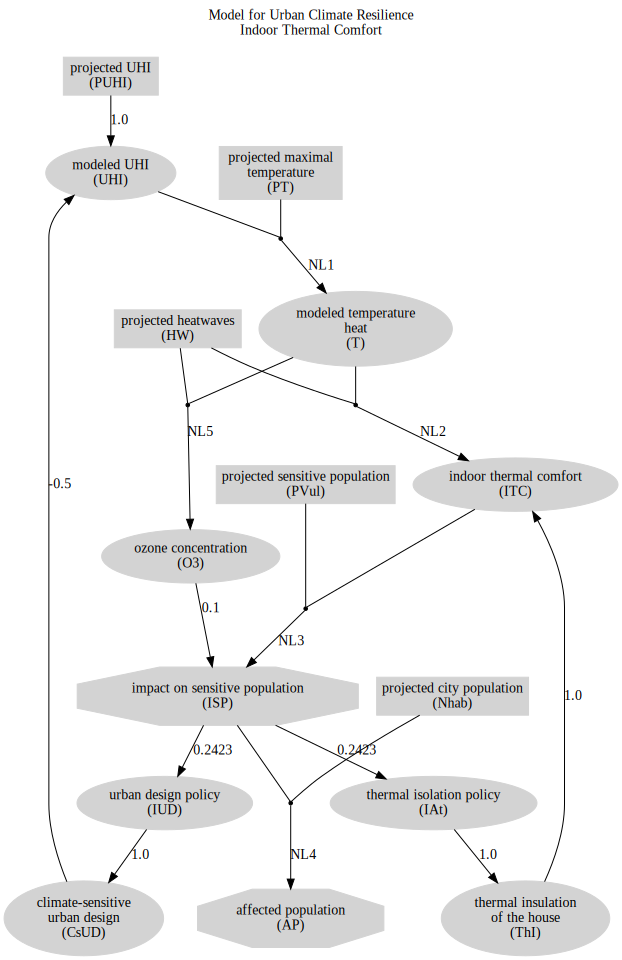

In [7]:
#map = city_map(x, 'Cerrillos', 1, fed_weight=1.0)
map = city_map(x, 'Cerrillos', 1)
#map.show_graph(outputs = ['ISP','AP'], title = 'Heat and comfort conceptual map',save = 'calor')
map.show_graph(outputs = ['ISP','AP'],
               title = 'Model for Urban Climate Resilience\n Indoor Thermal Comfort\n ',save = 'calor')

In [22]:
def grafico_O3_impacto(mapa_con_O3, mapa_sin_O3, ciudad):
    o3_id = mapa_con_O3.nodes_id['O3']
    isp_id = mapa_con_O3.nodes_id['ISP']
    pvul_id = mapa_con_O3.forcers_id['PVul']

    begin=50
    end=135
    agno=1995-45
    r1 = range(begin+agno,end+agno)

    fig = plt.figure(figsize=(20,10))
    plt.suptitle(f"Efecto del ozono troposférico en {ciudad}", size=30, y=1.02)

    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title('Evolución del ozono troposférico', size=20)
    ax1.set_xlabel('Año', size=20)
    ax1.set_ylabel('Nivel relativo de O₃', size=20)
    ax1.tick_params(axis='both', labelsize=15)
    ax1.plot(r1, mapa_con_O3.scene[begin:end, o3_id], '-o', color='tab:orange', label='O₃ modelado')
    ax1.legend(fontsize=15)

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Porcentaje de población sensible afectada por el calor', size=20)
    ax2.set_xlabel('Año', size=20)
    ax2.set_ylabel('% población sensible afectada', size=20)
    ax2.tick_params(axis='both', labelsize=15)

    isp_con = mapa_con_O3.scene[begin:end, isp_id]
    isp_sin = mapa_sin_O3.scene[begin:end, isp_id]
    pvul = mapa_con_O3.f_scene[begin:end, pvul_id]

    ax2.plot(r1, isp_sin * 100 / pvul, '-o', color='tab:blue', label='Sin ozono')
    ax2.plot(r1, isp_con * 100 / pvul, '-o', color='tab:red', label='Con ozono')
    ax2.legend(fontsize=15)

    plt.tight_layout()
    plt.savefig('grafico_O3_impacto.pdf', bbox_inches='tight')
    plt.show()

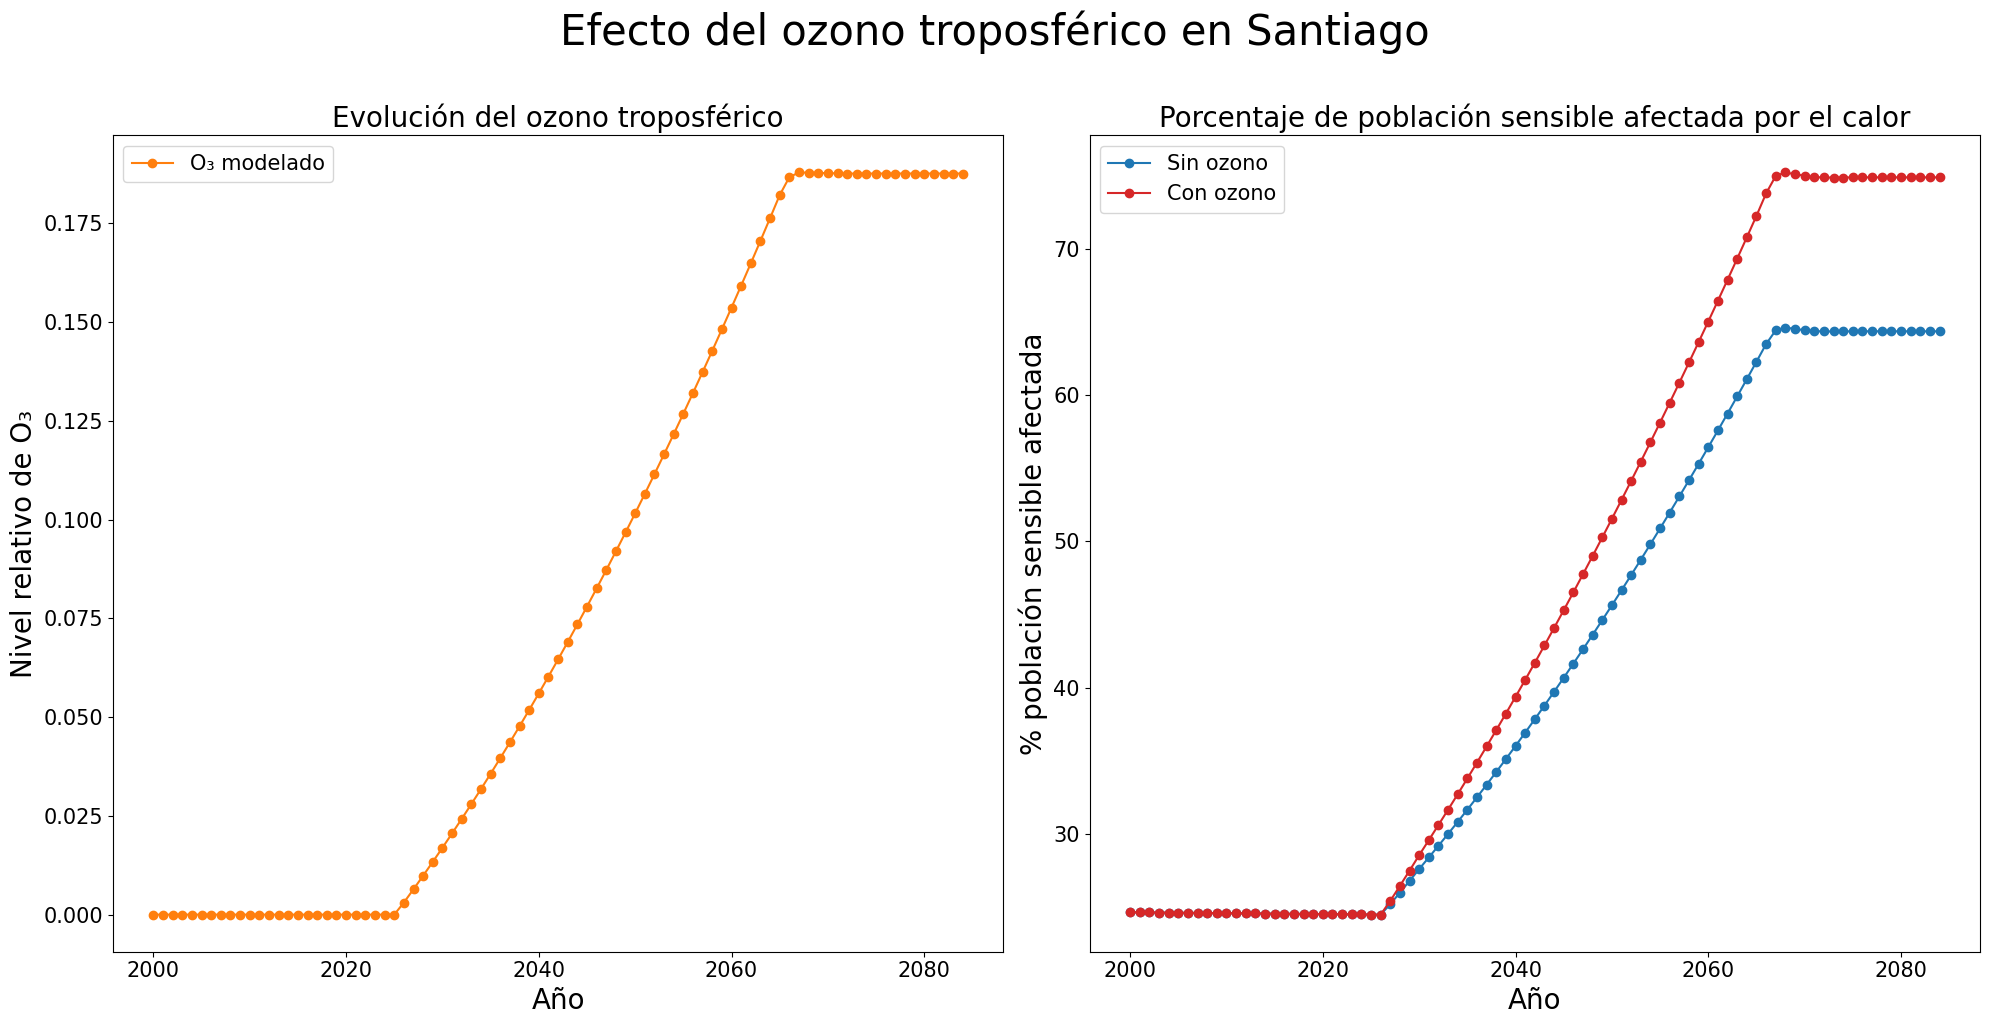

In [23]:
mapa_sin_O3 = city_map_sin_ozono(x,"Santiago",1)
mapa_con_O3 = city_map(x,"Santiago",1)
grafico_O3_impacto(mapa_con_O3, mapa_sin_O3, "Santiago")


### Ejemplo de simulación para una ciudad específica

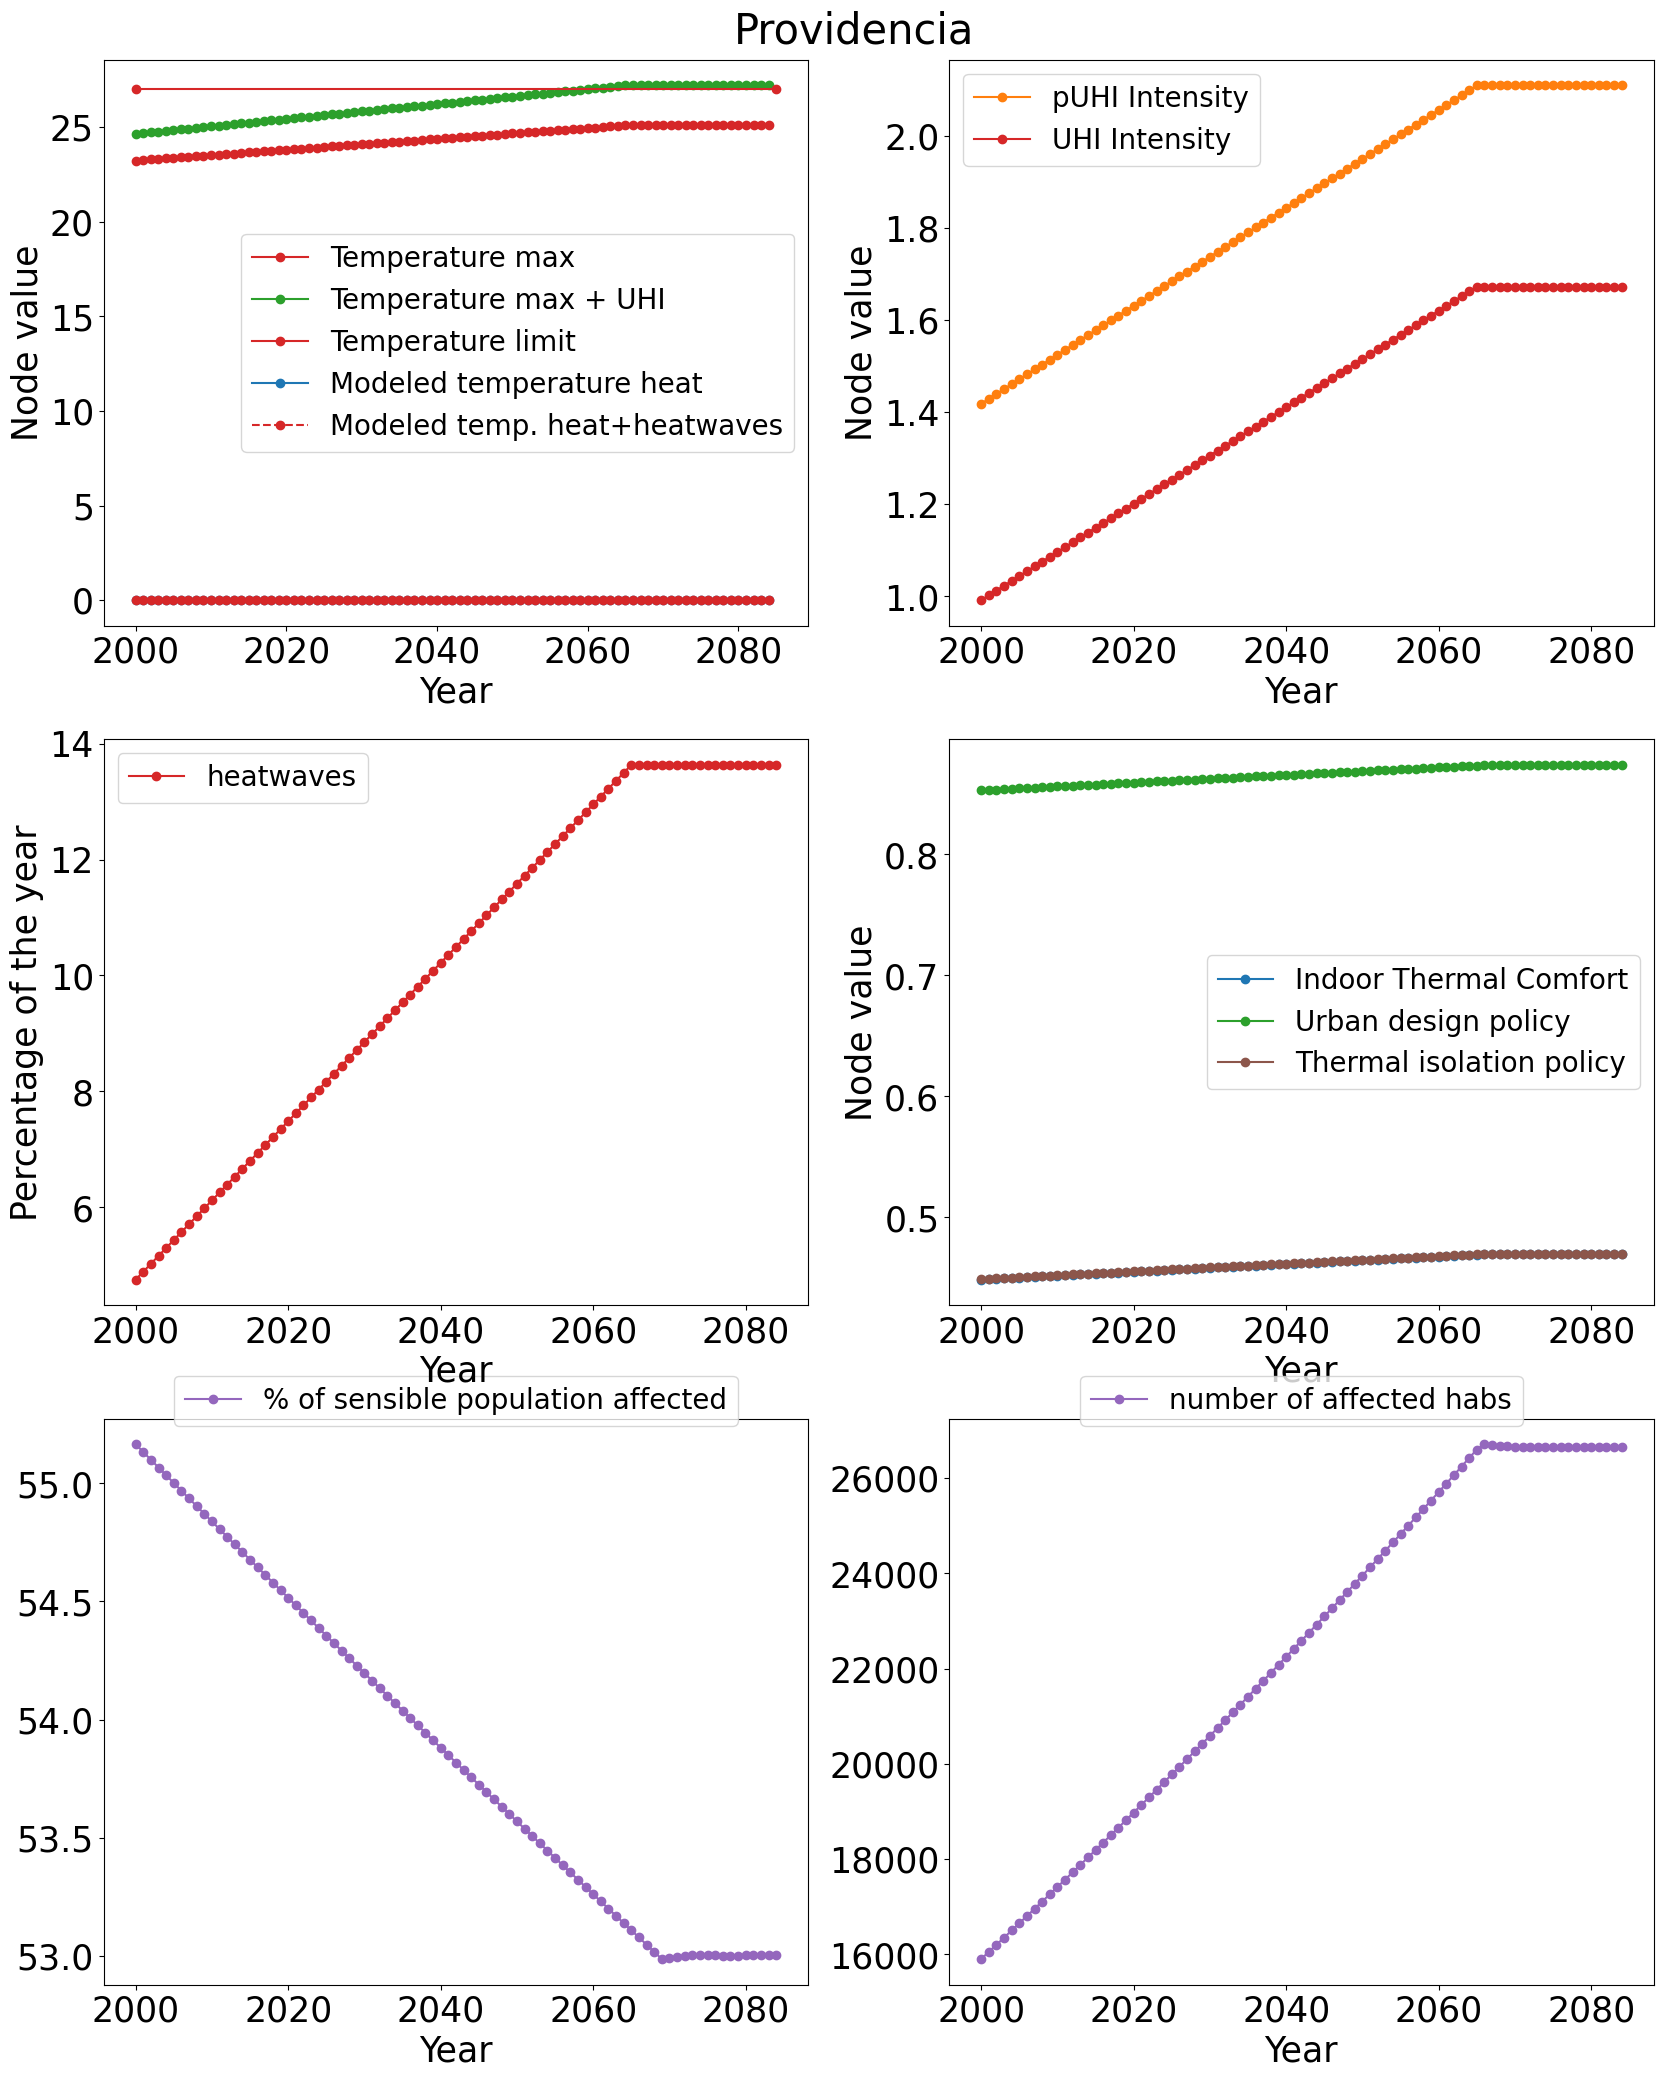

In [9]:
city='Providencia'
map = city_map(x,city,1)
grafico(map,city)

### Ciudad bajo distintos escenarios

### Política de aumento

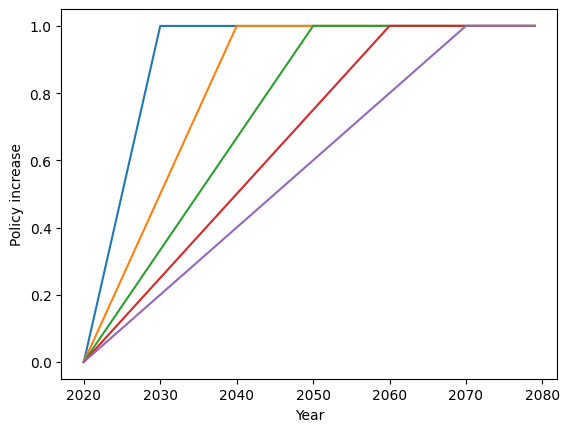

In [10]:
## Gráfico 2
slopes = np.array([10,20,30,40,50])
#ax02 = fig.add_subplot(2,1,2)
w_increase = lambda x,slope : max(min(1/slope * (x-70), 1.0),0.0)
w_increase_v=np.vectorize(w_increase)
begin=70
end=130
agno=1995-45
rang=range(begin,end)
rang2=range(begin+agno,end+agno)
for slope in slopes:
    y1 = w_increase_v(np.array(rang),slope)
    plt.plot(rang2,y1,label='q')
plt.xlabel('Year')
plt.ylabel('Policy increase')
plt.savefig('politica4.pdf', bbox_inches = 'tight')
plt.show()

### Simulación de la ciudad

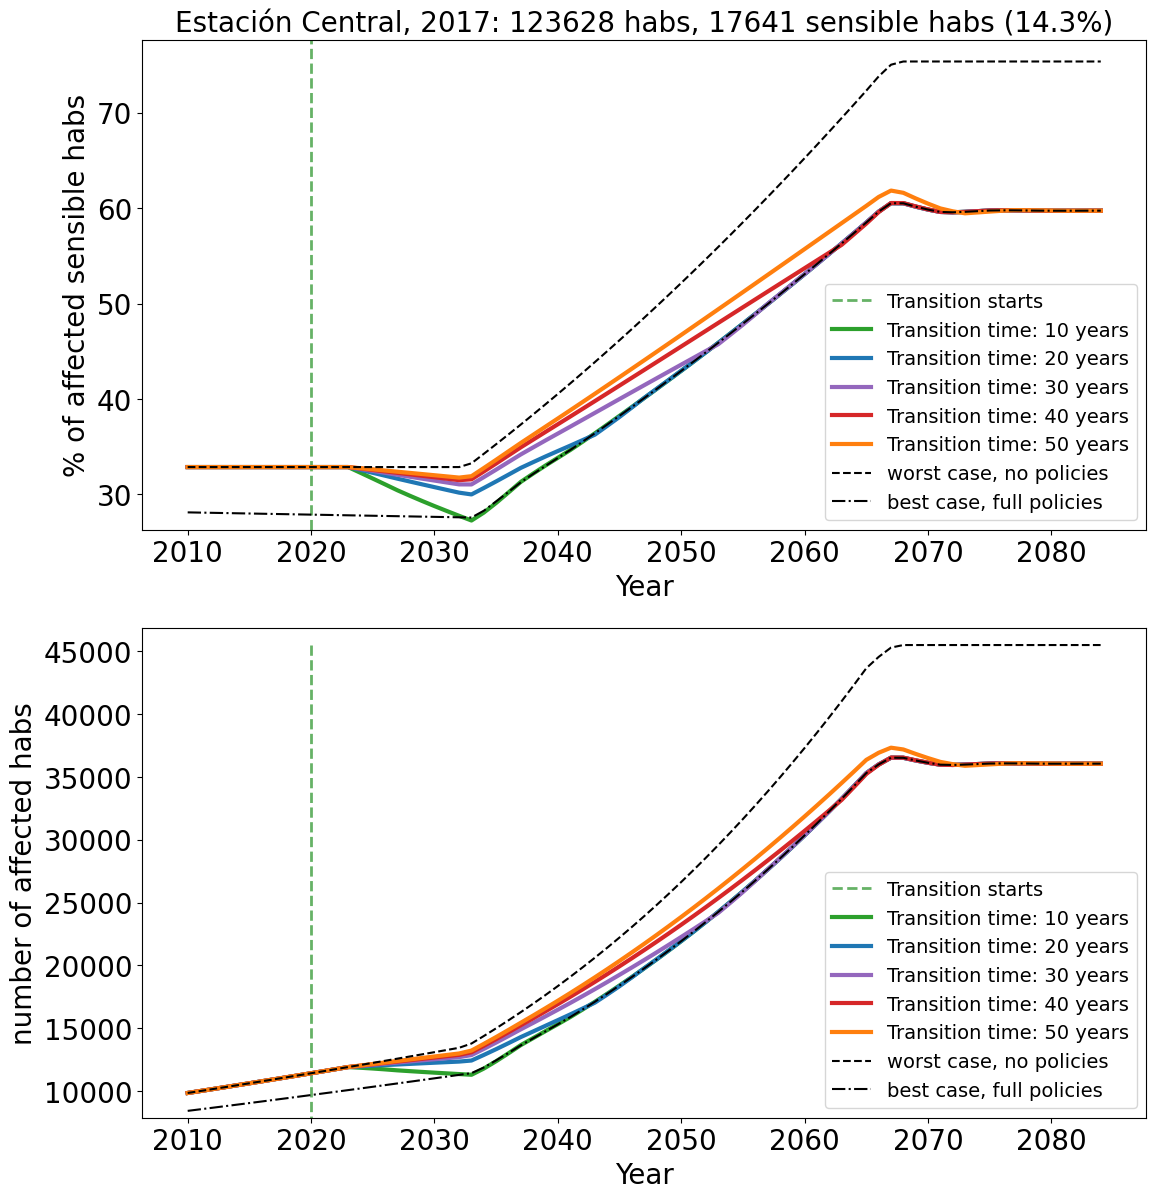

In [11]:
city='Estación Central'
#city='Calama'
N_iter=200
map = city_map(x,city,1)
isp_id = map.nodes_id['ISP']
pvul_id = map.forcers_id['PVul']
nhab_id = map.forcers_id['Nhab']

slopes = np.array([10,20,30,40,50])
output1a = np.empty((len(slopes), N_iter + 1))
output1b = np.empty((len(slopes), N_iter + 1))
# Simulación pesos de políticas intermedios, hay que setear esto en cero!
for i in range(len(slopes)):
  map = city_map(x,city,4,slope=slopes[i])
  output1a[i] = 100*map.scene[:,isp_id].copy() / map.f_scene[:,pvul_id].copy()
  output1b[i] = map.scene[:,isp_id].copy() * map.f_scene[:,nhab_id].copy()

# Simulación pesos de políticas extremos
weights = [0.0, 1.0]
output2a = np.empty((len(weights), N_iter + 1))
output2b = np.empty((len(weights), N_iter + 1))
for i in range(len(weights)):
    map = city_map(x,city,1,fed_weight=weights[i])
    output2a[i] = 100*map.scene[:,isp_id].copy() / map.f_scene[:,pvul_id].copy()
    output2b[i] = map.scene[:,isp_id].copy() * map.f_scene[:,nhab_id].copy()

fig = plt.figure(figsize=(8*1.62,2*7))

### Gráfico 1
ax01 = fig.add_subplot(2,1,1)
ax01.set_xlabel('Year', size = 20)
ax01.set_ylabel('% of affected sensible habs', size = 20)
ax01.tick_params(axis='both', which='major', labelsize=20)
#ax01.set_ylim(60,101)

begin = 60
begin2 = 70
end = 135
agno=1995-45
r1 = range(begin+agno,end+agno)
r= range(begin,end)
ax01.set_ylim(0.8*output2a[0,begin],1.3*output2a[1,end])
ax01.plot([begin2+agno,begin2+agno],[0.0,110.0],'--', color = 'g', alpha = 0.6, label = 'Transition starts', linewidth = 2)

ax01.plot(r1,output1a[0,r],'-', color = 'tab:green', linewidth = 3,
          label = f'Transition time: {10*(0+1)} years')
ax01.plot(r1,output1a[1,r],'-', color = 'tab:blue', linewidth = 3,
          label = f'Transition time: {10*(1+1)} years')
ax01.plot(r1,output1a[2,r],'-', color = 'tab:purple', linewidth = 3,
          label = f'Transition time: {10*(2+1)} years')
ax01.plot(r1,output1a[3,r],'-', color = 'tab:red', linewidth = 3,
          label = f'Transition time: {10*(3+1)} years')
ax01.plot(r1,output1a[4,r],'-', color = 'tab:orange', linewidth = 3,
          label = f'Transition time: {10*(4+1)} years')

ax01.plot(r1,output2a[0,r],'--', color = 'k', label = f'worst case, no policies')
ax01.plot(r1,output2a[1,r],'-.', color = 'k', label = f'best case, full policies')

ax01.legend(fontsize = 14)
nhabs = map.f_scene[0,nhab_id]
p_vul = map.f_scene[0,pvul_id]
ax01.set_title(f'{city}, 2017: {nhabs:.0f} habs, {nhabs*p_vul:.0f} sensible habs ({p_vul*100:.1f}%)', size = 20)

### Gráfico 2
ax02 = fig.add_subplot(2,1,2)
ax02.set_xlabel('Year', size = 20)
ax02.set_ylabel('number of affected habs', size = 20)
ax02.tick_params(axis='both', which='major', labelsize=20)

begin = 60
begin2 = 70
end = 135
agno=1995-45
r1 = range(begin+agno,end+agno)
r= range(begin,end)
ax02.set_ylim(0.8*output2b[0,begin],1.3*output2b[1,end])
ax02.plot([begin2+agno,begin2+agno],[0.0,output2b[0,:].max()],'--', color = 'g', alpha = 0.6,
          label = 'Transition starts', linewidth = 2)
ax02.plot(r1,output1b[0,r],'-', color = 'tab:green', linewidth = 3,
          label = f'Transition time: {10*(0+1)} years')
ax02.plot(r1,output1b[1,r],'-', color = 'tab:blue', linewidth = 3,
          label = f'Transition time: {10*(1+1)} years')
ax02.plot(r1,output1b[2,r],'-', color = 'tab:purple', linewidth = 3,
          label = f'Transition time: {10*(2+1)} years')
ax02.plot(r1,output1b[3,r],'-', color = 'tab:red', linewidth = 3,
          label = f'Transition time: {10*(3+1)} years')
ax02.plot(r1,output1b[4,r],'-', color = 'tab:orange', linewidth = 3,
          label = f'Transition time: {10*(4+1)} years')

ax02.plot(r1,output2b[0,r],'--', color = 'k', label = f'worst case, no policies')
ax02.plot(r1,output2b[1,r],'-.', color = 'k', label = f'best case, full policies')

ax02.legend(fontsize = 14)


plt.margins(0.05,0.05)
plt.savefig('transitions.pdf', bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


### Comparación entre ciudades agrupadas por gestión y adaptación

### Politica de aumento 1: esfuerzo constante

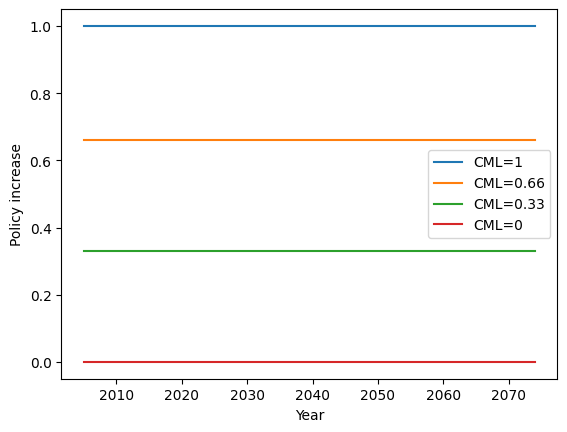

In [12]:
range_fed_weight=[1, 0.66, 0.33, 0]
w_increase = lambda x : x*0 + fed_weight
w_increase_v=np.vectorize(w_increase)
begin=45
end=115
agno=2010-50
rang=range(begin,end)
rang2=range(begin+agno,end+agno)
for fed_weight in range_fed_weight:
    y1 = w_increase_v(np.array(rang))
    plt.plot(rang2,y1,label=f'CML={fed_weight}')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Policy increase')
plt.savefig('politica1.pdf', bbox_inches = 'tight')
plt.show()

### Politica de aumento 2: esfuerzo creciente

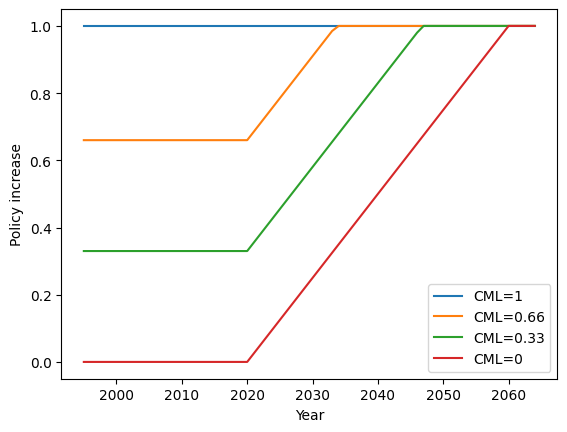

In [13]:
range_fed_weight=[1, 0.66, 0.33, 0]
#w_increase = lambda x : min((x>55)*min(0.25/10 * (x-55) , 1.0) + fed_weight, 1.0)*(fed_weight!=0)
begin2=70
w_increase = lambda x : min((x>begin2)*min(0.25/10 * (x-begin2) , 1.0) + fed_weight, 1.0)
w_increase_v=np.vectorize(w_increase)
begin=45
end=115
agno=1995-45
rang=range(begin,end)
rang2=range(begin+agno,end+agno)
for fed_weight in range_fed_weight:
    y1 = w_increase_v(np.array(rang))
    plt.plot(rang2,y1,label=f'CML={fed_weight}')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Policy increase')
plt.savefig('politica2.pdf', bbox_inches = 'tight')
plt.show()

### Politica de aumento 3: esfuerzo creciente solo para las tres primeras categorías

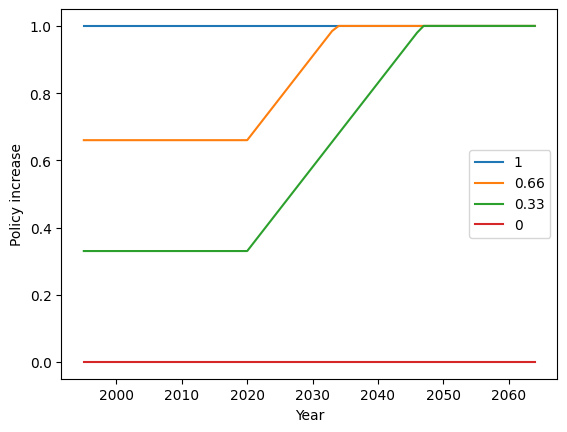

In [14]:
range_fed_weight=[1, 0.66, 0.33, 0]
begin2=70
w_increase = lambda x : min((x>begin2)*min(0.25/10 * (x-begin2) , 1.0) + fed_weight, 1.0)*(fed_weight!=0)
w_increase_v=np.vectorize(w_increase)
begin=45
end=115
agno=1995-45
rang=range(begin,end)
rang2=range(begin+agno,end+agno)
for fed_weight in range_fed_weight:
    y1 = w_increase_v(np.array(rang))
    plt.plot(rang2,y1,label=f'{fed_weight}')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Policy increase')
plt.savefig('politica3.pdf', bbox_inches = 'tight')
plt.show()

### Simulación de las ciudades agrupadas por gestión y adaptación

[0.2423 0.3015 0.5256 0.3222 0.2745 0.3631 0.3713 0.3148 0.4407 0.3746
 0.4167 0.3065 0.3383 0.3235 0.4331 0.4355 0.4531 0.3125 0.4865 0.418
 0.4322 0.5013 0.3201 0.402  0.4503 0.4576 0.377  0.442  0.4525 0.2885
 0.3513 0.3954]
[0.33, 0.33, 0.66, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.66, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33]
[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084]


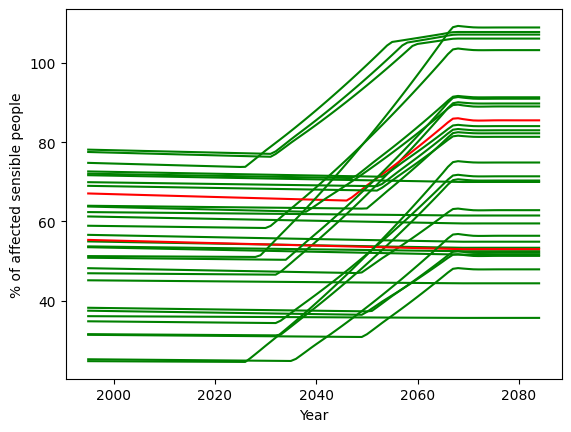

In [15]:
comunas = x['Comuna'].values
ifed_weight = x['CMLindex'].values
print(ifed_weight)

def group_fed_weight(fed_weight):
    expected_values = [1, 0.33, 0.66, 0]
    return min(expected_values, key=lambda x: abs(x - fed_weight))



ifed_weight2 = [group_fed_weight(w) for w in ifed_weight]
print(ifed_weight2)
# Salida: [1, 0.66, 0.33, 0.33, 0.33, 0]


N_iter = 200
opcion = 1 # opción 1 % de población sensible, opción 2 habitantes
politica= 1 # política 1 es esfuerzo constante, política 2 es esfuerzo en aumento, política 3 es esfuerzo en
            # aumento solo para las tres primeras categorías
outputs = np.empty((len(comunas), N_iter + 1))

begin=45
end=135
agno=1995-45
rang=range(begin,end)
rang2=range(begin+agno,end+agno)
print(list(rang2))
for k in range(len(comunas)):
#  map = city_map(x, ciudades[k],1,fed_weight=ifed_weight[k])
  map = city_map(x, comunas[k],politica)
  isp_id = map.nodes_id['ISP']
  if opcion==1:
      pvul_id = map.forcers_id['PVul']
      outputs[k,:] = 100*map.scene[:,isp_id].copy()/map.f_scene[:,pvul_id].copy()
  else:
      nhab_id = map.forcers_id['Nhab']
      outputs[k,:] = map.scene[:,isp_id].copy()*map.f_scene[:,nhab_id].copy()
  if ifed_weight2[k]==1:
      plt.plot(rang2,outputs[k,rang],color='blue')
  if ifed_weight2[k]==0.66:
      plt.plot(rang2,outputs[k,rang],color='red')
  if ifed_weight2[k]==0.33:
      plt.plot(rang2,outputs[k,rang],color='green')
  if ifed_weight2[k]==0:
      plt.plot(rang2,outputs[k,rang],color='pink')
plt.xlabel('Year')
if opcion==1:
    plt.ylabel('% of affected sensible people')
else:
    plt.ylabel('number of affected habitants')
plt.show()



fed_0 = x.index[x['CMLindex'] < 0.3].tolist()
fed_aux1 = x.index[x['CMLindex'] > 0.3].tolist()
fed_aux2 = x.index[x['CMLindex'] < 0.6].tolist()
fed_13 = list(set(fed_aux1) & set(fed_aux2))
fed_aux3 = x.index[x['CMLindex'] > 0.6].tolist()
fed_aux4 = x.index[x['CMLindex'] < 0.9].tolist()
fed_23 = list(set(fed_aux3) & set(fed_aux4))
fed_123 = list(set(fed_aux1) & set(fed_aux4))
fed_1 = x.index[x['CMLindex'] > 0.9].tolist()

#### Medias y varianzas por grupo

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:207: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


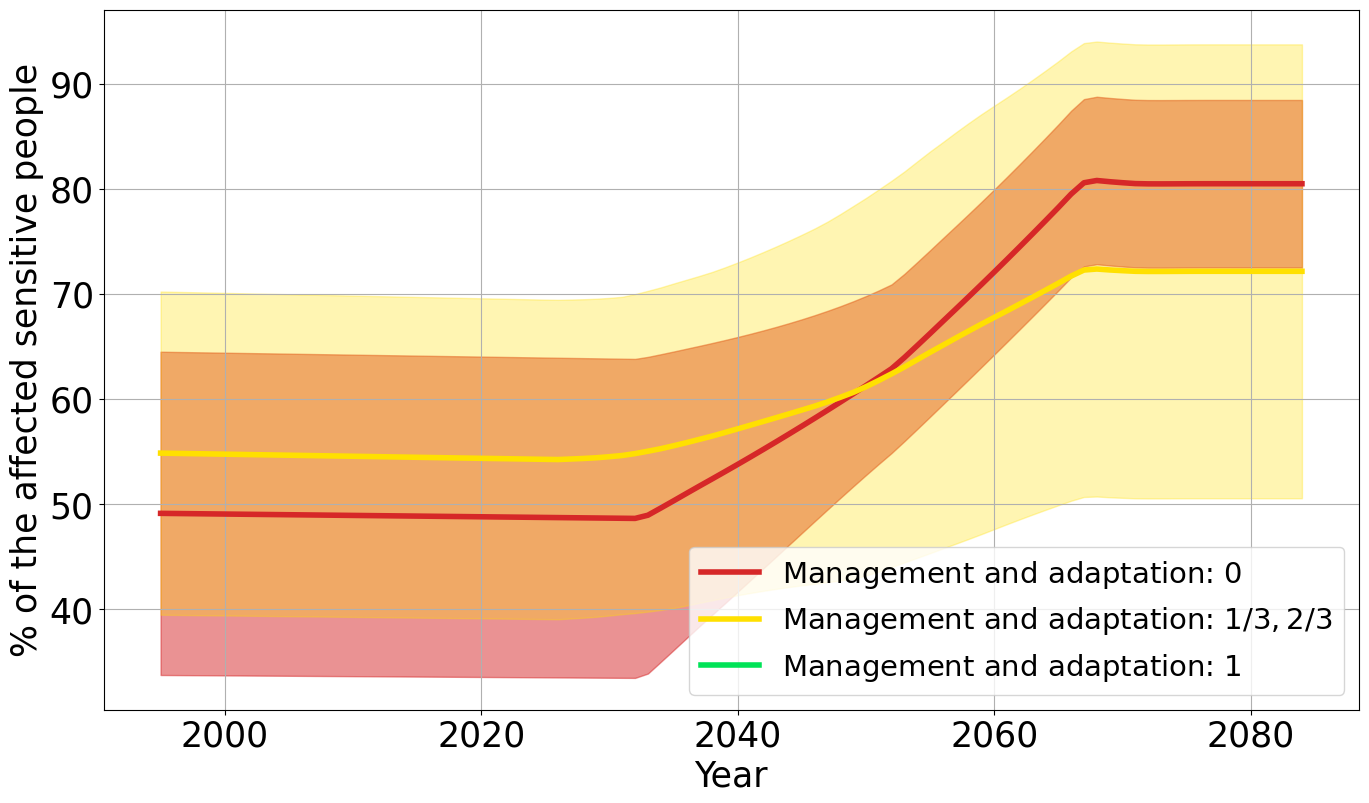

In [16]:
begin=45
end=135
agno=1995-45
rang=range(begin,end)
rang2=range(begin+agno,end+agno)

r=slice(begin,end)
mean_0 = np.mean(outputs[fed_0,r], axis = 0)
mean_13 = np.mean(outputs[fed_13,r], axis = 0)
mean_23 = np.mean(outputs[fed_23,r], axis = 0)
mean_1 = np.mean(outputs[fed_1,r], axis = 0)
mean_123 = np.mean(outputs[fed_123,r], axis = 0)

std_0 = np.std(outputs[fed_0,r], axis = 0)
std_13 = np.std(outputs[fed_13,r], axis = 0)
std_23 = np.std(outputs[fed_23,r], axis = 0)
std_1 = np.std(outputs[fed_1,r], axis = 0)
std_123 = np.std(outputs[fed_123,r], axis = 0)

sum_0 = np.sum(outputs[fed_0,r], axis = 0)
sum_13 = np.sum(outputs[fed_13,r], axis = 0)
sum_23 = np.sum(outputs[fed_23,r], axis = 0)
sum_1 = np.sum(outputs[fed_1,r], axis = 0)
sum_123 = np.sum(outputs[fed_123,r], axis = 0)

#rr = np.arange(0,100,1)
rr = np.arange(begin+agno,end+agno,1)

fig = plt.figure(figsize=(10*1.62,2*10))

###-----------------------------------------------------------------------------

ax01 = fig.add_subplot(2,1,1)
ax01.set_title(r'')
ax01.set_xlabel('Year', size = 25)
if opcion==1:
    ax01.set_ylabel('% of the affected sensitive people', size = 25)
else:
    ax01.set_ylabel('mean number of habitants', size = 25)

ax01.tick_params(axis='both', which='major', labelsize=25)

#ax01.set_ylim(30,110)
#ax01.set_xlim(1,71)

ax01.plot(rr, mean_0, linestyle = 'solid', linewidth = 4,
          color = 'tab:red', label = r'Management and adaptation: $0$')
ax01.fill_between(rr, mean_0 - std_0, mean_0 + std_0, color = 'tab:red', alpha = 0.5)

#ax01.plot(rr, mean_13, linestyle = 'dashed', linewidth = 4,
#          color = '#FFAB3A', label = r'Management and adaptation: $1/3$')
#ax01.fill_between(rr, mean_13 - std_13, mean_13 + std_13, color = '#FFAB3A', alpha = 0.1)

#ax01.plot(rr, mean_23, linestyle = 'dashdot', linewidth = 4,
#          color = '#8101FA', label = r'Management and adaptation: $2/3$')
#ax01.fill_between(rr, mean_23 - std_23, mean_23 + std_23, color = '#8101FA', alpha = 0.1)

ax01.plot(rr, mean_123, linestyle = 'solid', linewidth = 4,
          color = '#ffe000', label = r'Management and adaptation: $1/3,2/3$')
ax01.fill_between(rr, mean_123 - std_123, mean_123 + std_123, color = '#ffe000', alpha = 0.3)

ax01.plot(rr, mean_1, linestyle = 'solid', linewidth = 4,
          color = '#00E357', label = r'Management and adaptation: $1$')
ax01.fill_between(rr, mean_1 - std_1, mean_1 + std_1, color = '#00E357', alpha = 0.5)

ax01.legend(fontsize = 21, loc = 'lower right')
ax01.grid()

###-----------------------------------------------------------------------------

if opcion!=1:
    ax02 = fig.add_subplot(2,1,2)
    ax02.set_title(r'')
    ax02.set_xlabel('Year', size = 25)
    if opcion==1:
        ax02.set_ylabel('sum % of the affected sensitive people', size = 25)
    else:
        ax02.set_ylabel('sum number of habitants', size = 25)

    ax02.tick_params(axis='both', which='major', labelsize=25)

    #ax02.set_ylim(30,110)
    #ax02.set_xlim(1,71)

    ax02.plot(rr, sum_0, linestyle = 'solid', linewidth = 4,
              color = 'tab:red', label = r'Management and adaptation: $0$')

    #ax02.plot(rr, sum_13, linestyle = 'dashed', linewidth = 4,
    #          color = '#FFAB3A', label = r'Management and adaptation: $1/3$')

    #ax02.plot(rr, sum_23, linestyle = 'dashdot', linewidth = 4,
    #          color = '#8101FA', label = r'Management and adaptation: $2/3$')

    ax02.plot(rr, sum_123, linestyle = 'solid', linewidth = 4,
              color = '#ffe000', label = r'Management and adaptation: $1/3,2/3$')

    ax02.plot(rr, sum_1, linestyle = 'solid', linewidth = 4,
              color = '#00E357', label = r'Management and adaptation: $1$')

    ax02.legend(fontsize = 21, loc = 'lower right')
    ax02.grid()

plt.margins(0.05,0.05)
plt.savefig('ciudades_media.pdf', bbox_inches = 'tight')
plt.show()
#from tkinter import colorchooser
#colorchooser.askcolor()

#### Trayectorias coloreadas por variable

<ipython-input-17-2ada3ad51d4f>:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax03.legend(fontsize = 20)
<ipython-input-17-2ada3ad51d4f>:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax04.legend(fontsize = 20)


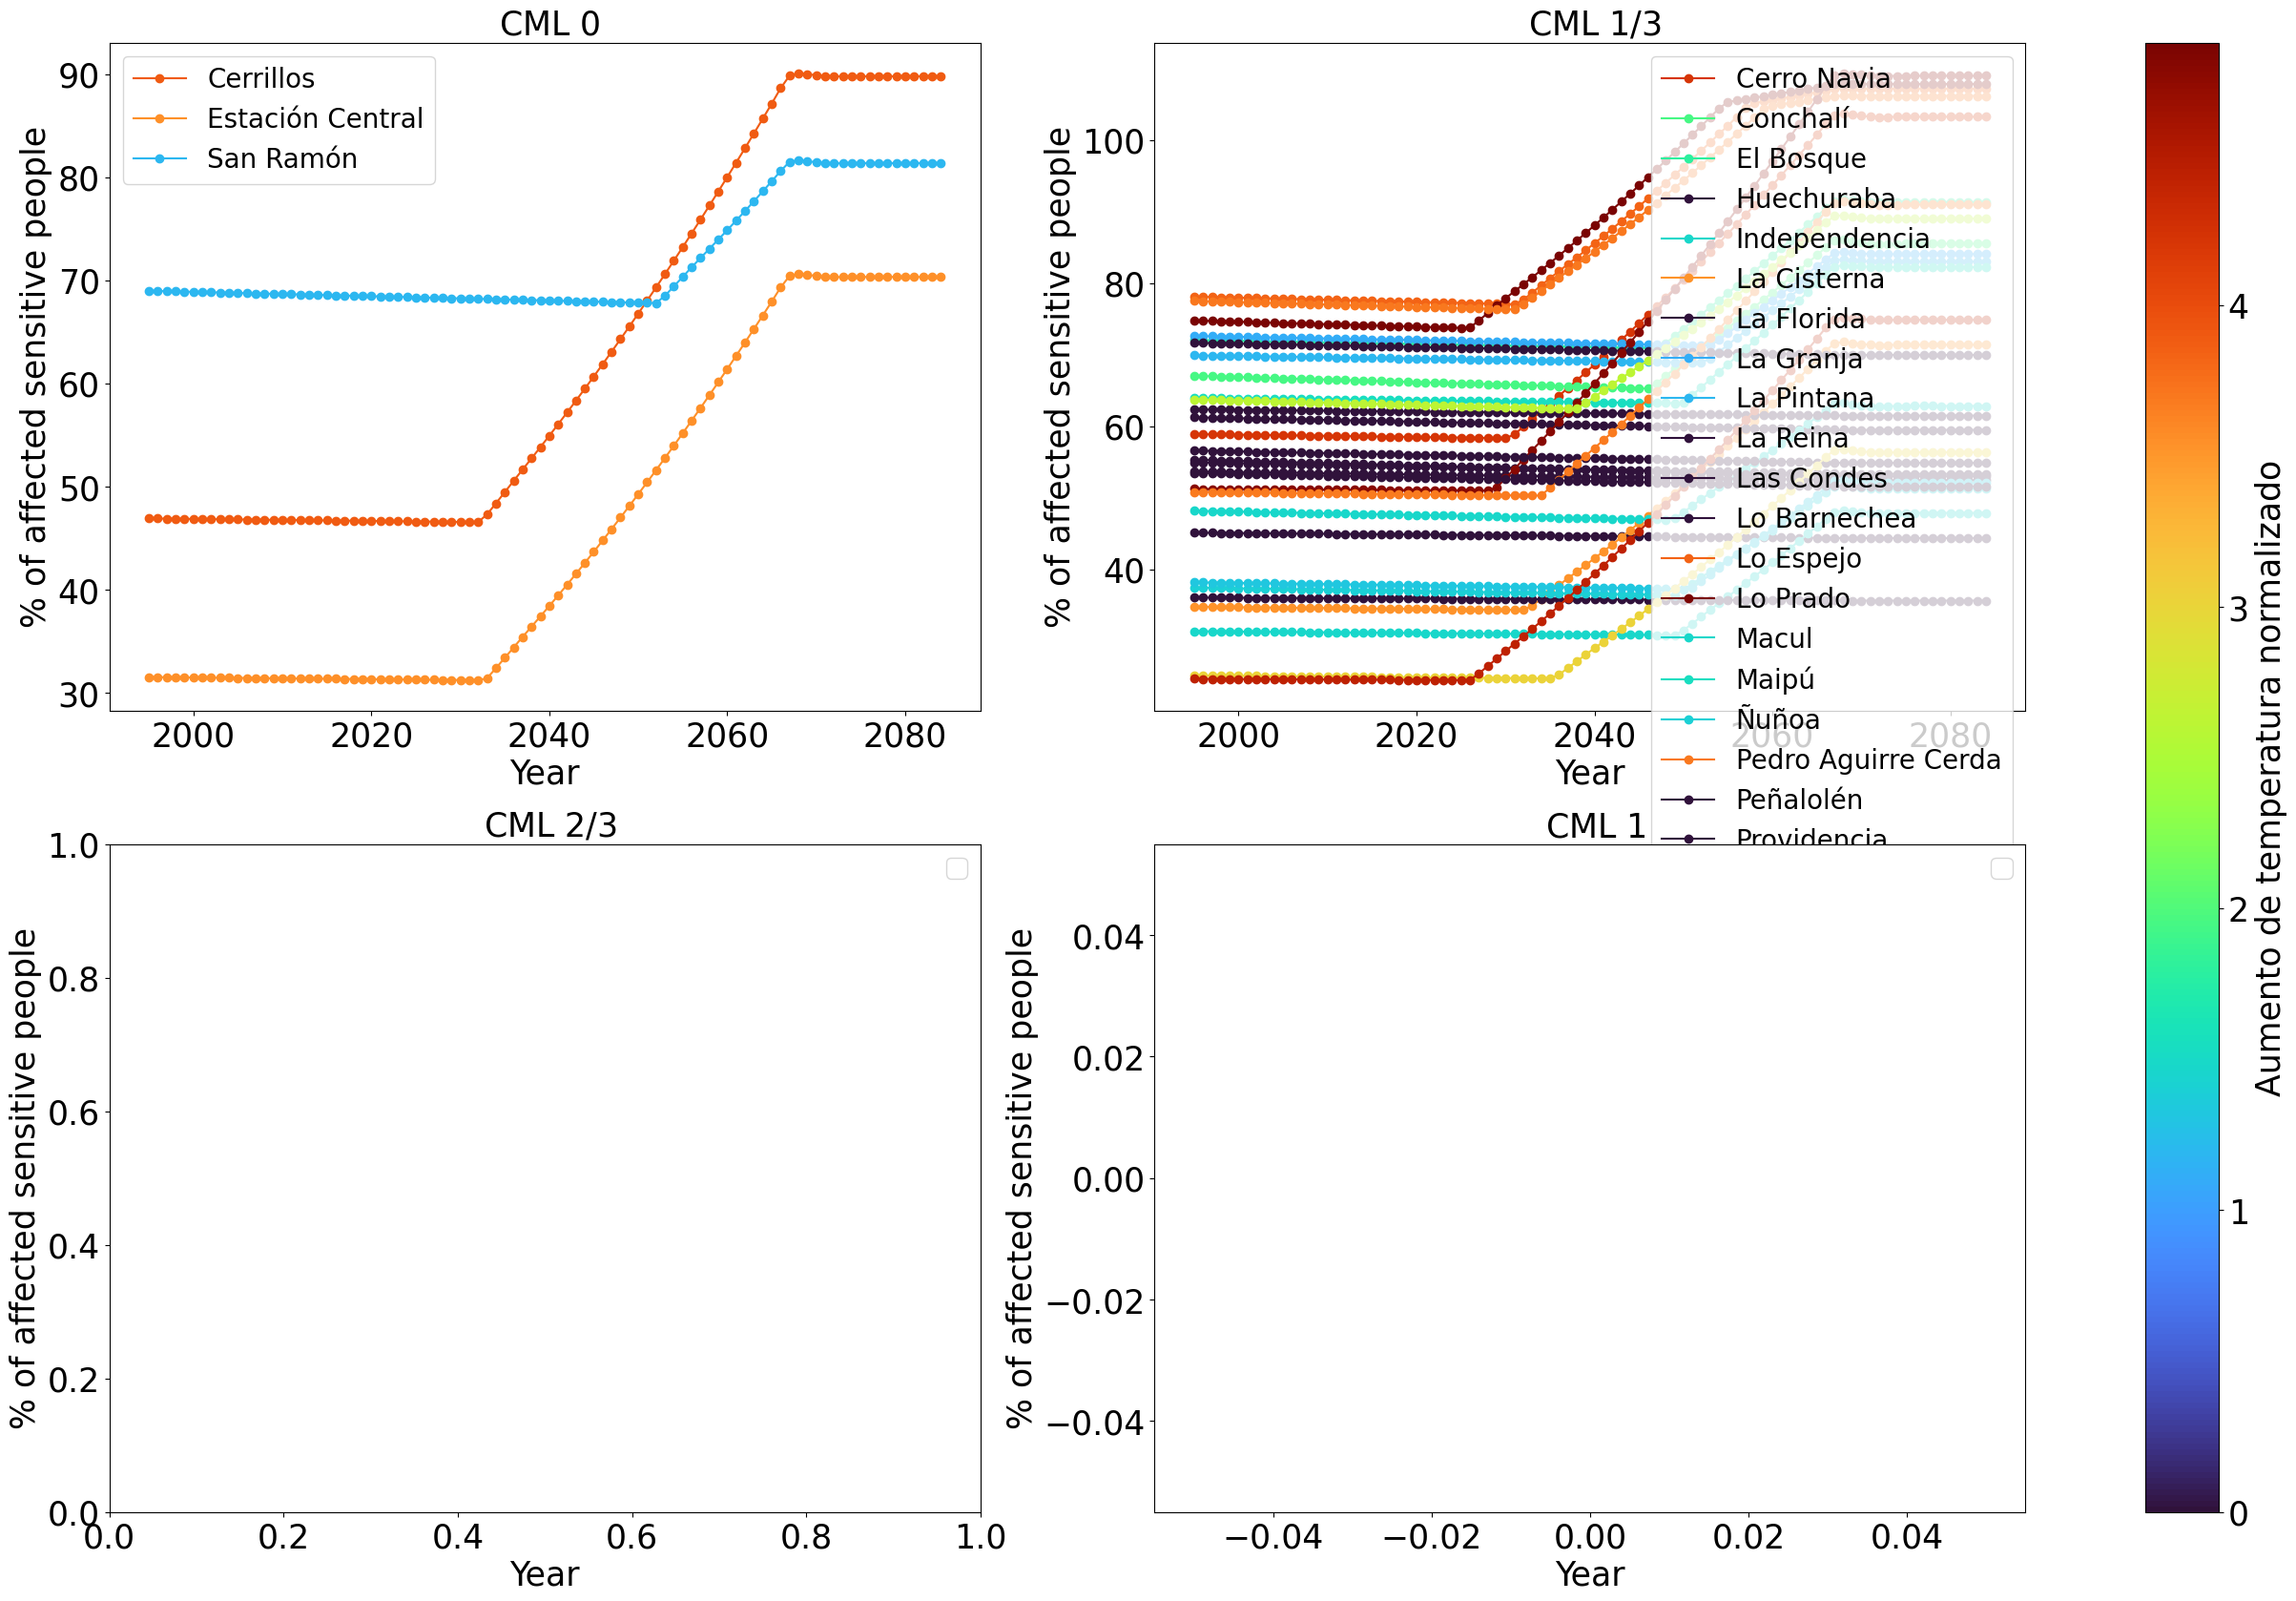

In [17]:
##REVISAR
fig = plt.figure(figsize=(20*1.62,20))

begin=45
end=135
agno=1995-45
rang=range(begin,end)
rang2=range(begin+agno,end+agno)

factor2=1/5
#factor2=0
#b = np.empty((len(ciudades), N_iter + 1))
a = np.empty(len(comunas))
for k in range(len(comunas)):
  map = city_map(x, comunas[k],politica)
  T_id = map.nodes_id['T']
  hw_id = map.forcers_id['HW']
  b = map.scene[:,T_id].copy()*(1+factor2*map.f_scene[:,hw_id].copy())
  a[k] = b.sum()/N_iter
#a=x['Tmax\n(fut)'].values-x['Tmax\n(pre)'].values+x['UHI\n(fut)'].values-x['UHI\n(pre)'].values
deltaT=a.max()-a.min()

###-----------------------------------------------------------------------------

ax01 = fig.add_subplot(2,2,1)
ax01.set_title(r' CML $0$', size=25)
ax01.set_xlabel('Year', size = 25)
if politica==1:
    ax01.set_ylabel('% of affected sensitive people', size = 25)
else:
    ax01.set_ylabel('number of affected habitants', size = 25)
ax01.tick_params(axis='both', which='major', labelsize=25)

#ax01.set_ylim(30,101)

for k in range(len(fed_0)):
  col = pl.cm.turbo((a[fed_0[k]]-a.min())/deltaT)
  ax01.plot(rang2,outputs[fed_0[k],rang],'-o', color = col, label = comunas[fed_0[k]])

ax01.legend(fontsize = 20)

###-----------------------------------------------------------------------------

ax02 = fig.add_subplot(2,2,2)
ax02.set_title(r' CML $1/3$', size=25)
ax02.set_xlabel('Year', size = 25)
if politica==1:
    ax02.set_ylabel('% of affected sensitive people', size = 25)
else:
    ax02.set_ylabel('number of affected habitants', size = 25)
ax02.tick_params(axis='both', which='major', labelsize=25)

#ax02.set_ylim(30,101)

for k in range(len(fed_13)):
  col = pl.cm.turbo((a[fed_13[k]]-a.min())/deltaT)
  ax02.plot(rang2,outputs[fed_13[k],rang],'-o', color = col, label = comunas[fed_13[k]])

ax02.legend(fontsize = 20)

###-----------------------------------------------------------------------------

ax03 = fig.add_subplot(2,2,3)
ax03.set_title(r' CML $2/3$', size=25)
ax03.set_xlabel('Year', size = 25)
if politica==1:
    ax03.set_ylabel('% of affected sensitive people', size = 25)
else:
    ax03.set_ylabel('number of affected habitants', size = 25)
ax03.tick_params(axis='both', which='major', labelsize=25)

#ax03.set_ylim(30,101)

for k in range(len(fed_23)):
  col = pl.cm.turbo((a[fed_23[k]]-a.min())/deltaT)
  ax03.plot(rang2,outputs[fed_23[k],rang],'-o', color = col, label = comunas[fed_23[k]])

ax03.legend(fontsize = 20)

###-----------------------------------------------------------------------------

ax04 = fig.add_subplot(2,2,4)
ax04.set_title(r' CML $1$', size=25)
ax04.set_xlabel('Year', size = 25)
if politica==1:
    ax04.set_ylabel('% of affected sensitive people', size = 25)
else:
    ax04.set_ylabel('number of affected habitants', size = 25)
ax04.tick_params(axis='both', which='major', labelsize=25)

#ax04.set_ylim(30,101)

for k in range(len(fed_1)):
  col = pl.cm.turbo((a[fed_1[k]]-a.min())/deltaT)
  ax04.plot(rang2,outputs[fed_1[k],rang],'-o', color = col, label = comunas[fed_1[k]])

ax04.legend(fontsize = 20)

norm = mpl.colors.Normalize(vmin=a.min(), vmax=a.max())

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=pl.cm.turbo),
             ax= fig.axes, label= 'Aumento de temperatura normalizado')
cbar.ax.tick_params(labelsize=25)
cbar.set_label('Aumento de temperatura normalizado', size= 25)

plt.margins(0.05,0.05)
plt.savefig('ciudades_temperatura.pdf', bbox_inches = 'tight')
plt.show()

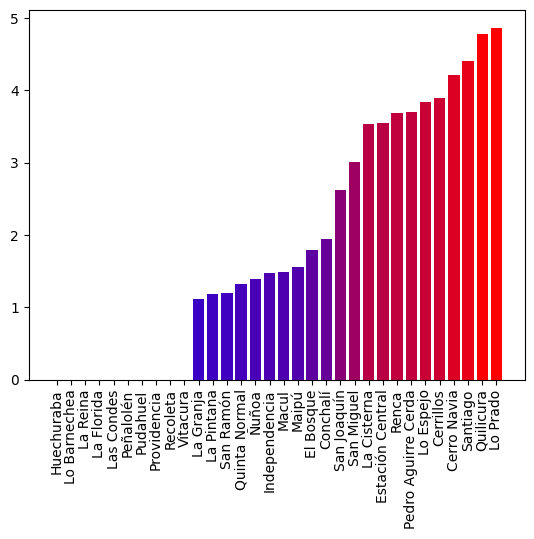

In [18]:
col=(a-a.min())/deltaT
idx=np.argsort(a)
ccol=1-col[idx]
bcol=[]
for i in range(len(a)):
    bcol.append((1-ccol[i],0*ccol[i],ccol[i]))
plt.bar(comunas[idx],a[idx],color=bcol)
plt.xticks(rotation='vertical')
plt.savefig('ciudades_orden.pdf', bbox_inches = 'tight')
plt.show()

In [19]:
print(comunas)

['Cerrillos' 'Cerro Navia' 'Conchalí' 'El Bosque' 'Estación Central'
 'Huechuraba' 'Independencia' 'La Cisterna' 'La Florida' 'La Granja'
 'La Pintana' 'La Reina' 'Las Condes' 'Lo Barnechea' 'Lo Espejo'
 'Lo Prado' 'Macul' 'Maipú' 'Ñuñoa' 'Pedro Aguirre Cerda' 'Peñalolén'
 'Providencia' 'Pudahuel' 'Quilicura' 'Quinta Normal' 'Recoleta' 'Renca'
 'San Joaquín' 'San Miguel' 'San Ramón' 'Santiago' 'Vitacura']


In [20]:
pip install pyuca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.6 MB/s eta 0:00:00


In [21]:
import folium
import geopandas as gpd
import pandas as pd
from pyuca import Collator

collator = Collator()

# Cargamos el archivo geojson completo (con todas las comunas de Chile)
gdf = gpd.read_file('practica1/13.geojson')


# Filtramos el GeoDataFrame para quedarnos solo con las comunas de Santiago
gdf_santiago = gdf[gdf['Comuna'].isin(comunas)]
gdf_santiago = gdf_santiago.sort_values(key=lambda x: x.map(collator.sort_key), by='Comuna')

gdf_santiago['valor'] = a  # Agregamos los valores de 'a' como una nueva columna en el GeoDataFrame

# Crear un mapa centrado en Santiago de Chile
m = folium.Map(location=[-33.4489, -70.6693], zoom_start=12)

# Mapa de colores
folium.Choropleth(
    geo_data=gdf_santiago,
    name='choropleth',
    data=gdf_santiago,
    columns=['Comuna', 'valor'],
    key_on='feature.properties.Comuna',
    fill_color='Reds',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Valor'
).add_to(m)

folium.LayerControl().add_to(m)

# Guardar el mapa en un archivo HTML
m.save("mapa_comunas_santiago.html")
m
